In [ ]:
from dask_jobqueue import SLURMCluster

cluster = SLURMCluster(
    job_name="Climt2",          # --job-name
    cores=2,                     # Number of cores per task (adjust if needed)
    processes=1,                 # One process per task
    memory="20GB",               # --mem
    walltime="01:00:00",         # --time
    queue="med",               # --partition
    log_directory=".",           # Logs will be saved to the current directory
)

import glob 
import os

/home1/nalex2023/.conda/envs/nma/lib/python3.13/site-packages/distributed/node.py:187: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 33177 instead
  warnings.warn(


In [2]:
from dask.distributed import Client
cluster.scale(jobs=4)
client = Client(cluster)


In [3]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.42.239.61:33177/status,
Dashboard: http://10.42.239.61:33177/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.42.239.61:33389,Workers: 0
Dashboard: http://10.42.239.61:33177/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly
import xarray as xr
import metpy.calc as mcalc

In [5]:
df_sbi = pd.read_csv('/home1/nalex2023/main/LSB_main/outs/2012_SBI_manus.csv')

df_sbi

,Unnamed: 0,time,SBI_index,lower_level_ws (10m m/s),lower_level_angle (10m degrees),upper_level_ws (500-2000m),upper_level_angle (500-2000m)
0,0,2012-01-16 05:00:00,0.637304,4.151435,140.000050,1.557064,238.44936
1,1,2012-01-16 06:00:00,0.642715,3.033572,140.000050,1.306648,232.05048
2,2,2012-01-16 07:00:00,0.642048,2.045269,140.000060,1.845295,244.55390
3,3,2012-01-17 09:00:00,0.284993,5.216792,162.999880,4.331855,255.26045
4,4,2012-01-17 10:00:00,0.247181,6.109944,165.666990,4.722740,257.64728
...,...,...,...,...,...,...,...
1154,1154,2012-12-28 17:00:00,0.880647,1.961895,62.000217,2.840548,198.09015
1155,1155,2012-12-28 18:00:00,0.879870,2.290128,62.000220,2.691335,191.81827
1156,1156,2012-12-28 19:00:00,0.882942,2.650915,62.000220,2.500046,185.45566
1157,1157,2012-12-28 20:00:00,0.847303,3.032661,62.000217,2.507932,185.73666


In [6]:

era5_data_2012 = xr.open_mfdataset(
    'Datasets/era5_manus/*201210*.nc'
)

era5_data_2012_oct_2 = era5_data_2012.roll(valid_time=10).sel(valid_time='2012-10-01')



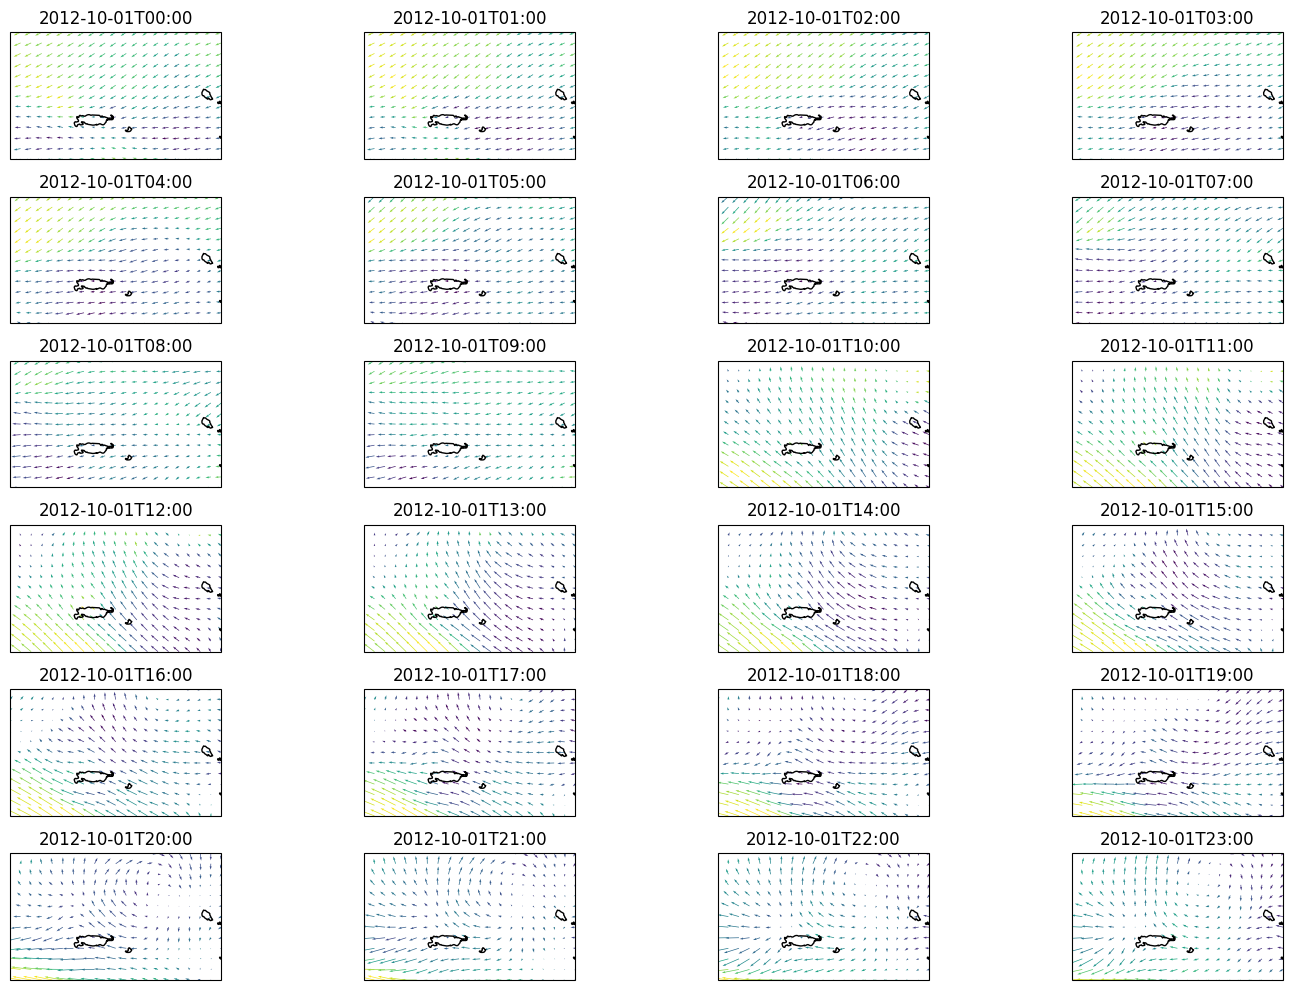

In [ ]:
import cartopy.crs as ccrs 


n_plots = len(era5_data_2012_oct_2.valid_time)
col_wrap = 4

fig, axes = plt.subplots(
    nrows=(n_plots + col_wrap - 1) // col_wrap,
    ncols=col_wrap,
    figsize=(15, 10),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

axes = axes.flatten()


for i, ax in enumerate(axes):
    if i >= n_plots:
        ax.axis('off')
        continue
    time_step = era5_data_2012_oct_2.isel(pressure_level=0,valid_time=i).sel(latitude=slice(0,-3),longitude=slice(145,160))
    #time_step.plot(ax=ax, transform=ccrs.PlateCarree(), vmin=25,vmax=30,cmap='RdBu_r',cbar_kwargs={'shrink': 0.6})
    
    x = time_step.longitude
    y = time_step.latitude
    u = time_step['u']
    v = time_step['v']
    z = time_step['t']
    ax.quiver(x,y,u,v,z,transform=ccrs.PlateCarree())
    #spd = era_dset_amie_diurnal.sel(valid_time=i).speed

    ax.set_title(str(time_step.valid_time.values)[:16])  # Trim timestamp
    ax.coastlines()
    ax.set_extent([145,150,-3,0])

plt.tight_layout()
plt.show()


#era5_data_2012_oct_2.u.isel(valid_time=1,pressure_level=0).plot(ax=ax[0])
#
#ax[0].coastlines()


In [9]:
visst_dsets = '/home1/nalex2023/Datasets/twpvisstgrid_manus/'


all_dsets = xr.open_mfdataset(visst_dsets+'*.cdf')


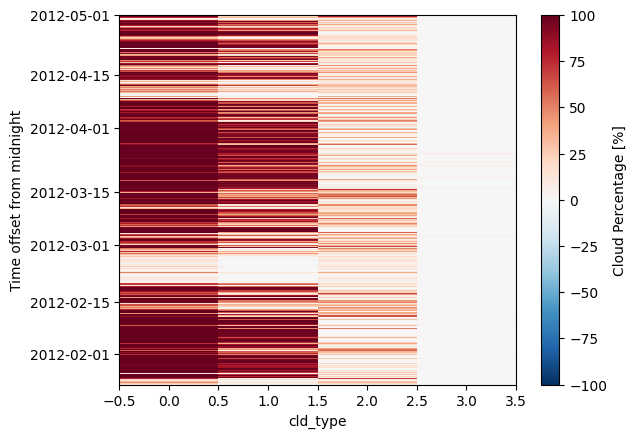

In [12]:
all_dsets.cloud_percentage.plot()